# Homework 3: Random Variables and Their Distributions
***

**Name**: Jacob Munoz (Collaborated with Kelsey Adams and Andrew Fay)

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday October 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
import math

from scipy.special import binom
%matplotlib inline

### [15 points] Problem 1 
***

A young boy and an old woman are playing [tic tac toe](https://en.wikipedia.org/wiki/Tic-tac-toe). Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The boy plays first and randomly places an X in an open square. The woman plays next, and randomly places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, the probability that the boy wins.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely don't be afraid to write helper functions that get called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an $X$ or an $O$ on an free square, or (iii) check if someone has one the game. This problem will not be autograded so feel free to get creative.  Just make sure to clearly display your results in code output and summarize things in Markdown. 

In [107]:
def placeX(board):
    squareRow = random.randint(0, 2)
    squareCol = random.randint(0,2)
    if(board[squareRow][squareCol] != 'x' and board[squareRow][squareCol] != 'o'):
        board[squareRow][squareCol] = 'x'
        return
    else:
        placeX(board)

def placeO(board):
    squareRow = random.randint(0, 2)
    squareCol = random.randint(0,2)
    if(board[squareRow][squareCol] != 'x' and board[squareRow][squareCol] != 'o'):
        board[squareRow][squareCol] = 'o'
        return
    else:
        placeO(board)

def play():
    #2D list to represent the board, seperated by rows
    board = [['0', '1', '2'], ['3', '4', '5'], ['6', '7', '8']]
    isWinner = False
    boyWin = 0
    while(isWinner == False):
        if(board[0][0] == '0' or board[0][1] == '1' or board[0][2] == '2' or board[1][0] == '3' or board[1][1] == '4' or board[1][2] == '5' or board[2][0] == '6' or board[2][1] == '7' or board[2][2] == '8'):
            placeX(board)
            if(board[0][0] == '0' or board[0][1] == '1' or board[0][2] == '2' or board[1][0] == '3' or board[1][1] == '4' or board[1][2] == '5' or board[2][0] == '6' or board[2][1] == '7' or board[2][2] == '8'):
                placeO(board)
        else:
            return 0
            
        if(board[0][0] == 'x' and board[0][1] == 'x' and board[0][2] == 'x'):
            isWinner = True
            boyWin = 1
        elif(board[1][0] == 'x' and board[1][1] == 'x' and board[1][2] == 'x'):
            isWinner = True
            boyWin = 1
        elif(board[2][0] == 'x' and board[2][1] == 'x' and board[2][2] == 'x'):
            isWinner = True
            boyWin = 1
        elif(board[0][0] == 'x' and board[1][0] == 'x' and board[2][0] == 'x'):
            isWinner = True
            boyWin = 1
        elif(board[0][1] == 'x' and board[1][1] == 'x' and board[2][1] == 'x'):
            isWinner = True
            boyWin = 1
        elif(board[0][2] == 'x' and board[1][2] == 'x' and board[2][2] == 'x'):
            isWinner = True
            boyWin = 1
        elif(board[0][0] == 'x' and board[1][1] == 'x' and board[2][2] == 'x'):
            isWinner = True
            boyWin = 1
        elif(board[0][2] == 'x' and board[1][1] == 'x' and board[2][0] == 'x'):
            isWinner = True
            boyWin = 1
        elif(board[0][0] == 'o' and board[0][1] == 'o' and board[0][2] == 'o'):
            isWinner = True 
        elif(board[1][0] == 'o' and board[1][1] == 'o' and board[1][2] == 'o'):
            isWinner = True
        elif(board[2][0] == 'o' and board[2][1] == 'o' and board[2][2] == 'o'):
            isWinner = True
        elif(board[0][0] == 'o' and board[1][0] == 'o' and board[2][0] == 'o'):
            isWinner = True
        elif(board[0][1] == 'o' and board[1][1] == 'o' and board[2][1] == 'o'):
            isWinner = True
        elif(board[0][2] == 'o' and board[1][2] == 'o' and board[2][2] == 'o'):
            isWinner = True
        elif(board[0][0] == 'o' and board[1][1] == 'o' and board[2][2] == 'o'):
            isWinner = True
        elif(board[0][2] == 'o' and board[1][1] == 'o' and board[2][0] == 'o'):
            isWinner = True
            
    return boyWin

boyWin = 0
for i in range(5000):
    boyWin = boyWin + play()
    boyProb = (boyWin / 5000) * 100
print ('The probability that the boy will win is: {}%'.format(boyProb))

The probability that the boy will win is: 59.18%


I went about this problem by creating a 2D list to represent the board. I would call the turns placeX and placO if and only if there is an open spot left on the board to avoid segfaults. I call placeX first so the boy goes first then after his turn placeO. After their turns I check for all cases of a winning combination. I start by checking for x wins first to account for the fact that both players place an x or o before checking for a win. By checking for x wins first (since x played first) it fixes this issue. The function returns 1 or 0, 1 for a boy win and 0 for a boy loss. I then simply play many games and average the win rate to see that on average the boy is more likely to win since he placed his x first.

### [20 points] Problem 2 
***

Let $X$ be the lifespan (in years) of a BF Goodrich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{10}{cx^2} & 1 \leq x \leq 10 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

$\frac{1}{c}\int_1^{10} \mathrm{\frac{10}{x^2}}\,\mathrm{d}x$ = 1  

$\frac{1}{c}\left(-\frac{10}{cx}\right)$(evaluated at 10 and 1) = 1  

$\frac{1}{c}$[(-1) - (-10)] = 1  

$\frac{1}{c}$(9) = 1  

c = 9

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

F(y) = $\int_1^y \mathrm{\frac{10}{9x^2}}\,\mathrm{d}x$  

= $\left(-\frac{10}{9x}\right)$(evaluated at y and 1)  

= -$\frac{10}{9y}$ + $\frac{10}{9}$  

Therefore:  

$$F(y)=\cases{
    0 ~\text{for y < 1} \\
    -\frac{10}{9y} + \frac{10}{9} ~\text{for}~1 \leq y \leq 10 \\
    1 ~\text{for y > 10} \\
}$$

**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 8 years without failing. 

The probabilty that a tire lasts longer than 8 years is (1 - F(8)) therefore:  

= (1 - ($-\frac{10}{72} + \frac{10}{9}$))  

= 1 - .9722 = 0.0277 

Meaning a tire has a 0.0277% chance of lasting longer than 8 years.

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $90\%$ of all tires will need to be replaced. In other words, determine the 90th percentile of the distribution of $X$. 

.90 = F($y_{.90}$)  

.90 = $-\frac{10}{9y_{.90}} + \frac{10}{9}$  

$y_{.90}$ = $\frac{-10}{\left((\frac{9}{10} - \frac{10}{9}) * 9 \right)}$  

$y_{.90}$ = 5.263  

Meaning that 90% of tires will need to be replaced around 5$\frac{1}{4}$ years.

**Part E**: What is the probability that all four BF Goodrich Rugged Trail T/A tires on a vehicle last longer than 8 years without failing? 

This can be seen as the chance a tire lasts longer than 8 years AND another one AND so on for 4 tires. Since the chance any given tire is 0.0277, we have:  

(.0277)(.0277)(.0277)(.0277) = 0.000000588% chance of all 4 tires lasting longer than 8 years

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [3]:
def pmf_natural(x):
    pmf = math.log10((x + 1)/x)
    return pmf 

**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

<Container object of 9 artists>

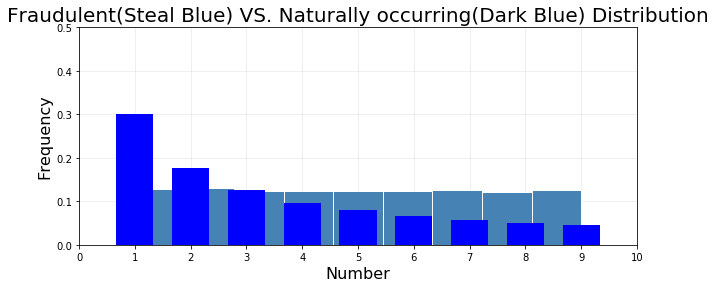

In [4]:
z = np.random.randint(1, 10, size=10000)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(z).hist(ax=ax, bins=9, color="steelblue", normed=True, edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(0,11));
ax.set_xlim([0,10])
ax.set_ylim([0,.5])

ax.set_title("Fraudulent(Steal Blue) VS. Naturally occurring(Dark Blue) Distribution", fontsize = 20)
ax.set_xlabel("Number", fontsize = 16)
ax.set_ylabel("Frequency", fontsize = 16)

#=====================================================================================

y = []
for i in range(1, 10):
    y.append(pmf_natural(i))
    
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
width = 1/1.5
plt.bar(x, y, width, color="blue")

Comparing the two distributions you can see that the fraudulent data follows a uniform distribution, probably because a person is attempting to randomize the numbers to appear legitimate. However, the naturally occurring data follows a right skewed distribution.

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [5]:
def cdf_natural(y):
    #add 1 to account for range
    y = y + 1
    prob = 0
    for i in range(y):
        if(i != 0):
            prob = prob + pmf_natural(i)
    return prob
print("The probability that the leading digit is at most 4 is: {}".format(cdf_natural(4)))
print("The probability that the leading digit is at most 5 is: {}".format(cdf_natural(5)))

The probability that the leading digit is at most 4 is: 0.6989700043360189
The probability that the leading digit is at most 5 is: 0.7781512503836436


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

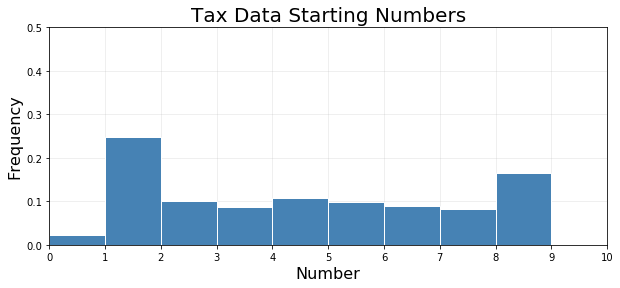

In [7]:
import re
file = open('tax_data.txt', 'r')
file = file.read()

#reads in all numbers from file into a list to work with, includings index numbers
#from stack overflow https://stackoverflow.com/questions/26824643/how-to-extract-only-numbers-from-input-file-numbers-can-be-float-int
taxData = re.findall(r"[-+]?\d*\.\d+|\d+", file)

#removes index numbers by taking every other element from the list
taxData = taxData[1::2]

#removes all but the first number and converts to float to compare to fraudulent data
taxData_first = [float(i[:1]) for i in taxData]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(taxData_first).hist(ax=ax, bins=9, color="steelblue", normed=True, edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(0,11));
ax.set_xlim([0,10])
ax.set_ylim([0,.5])

ax.set_title("Tax Data Starting Numbers", fontsize = 20)
ax.set_xlabel("Number", fontsize = 16)
ax.set_ylabel("Frequency", fontsize = 16)

Comparing the graph to the graphs of fraudulent and real starting numbers, I think it is safe to say that this data is fraudulent. It tends to follow a frequency much more closey to that of fradulent data, having 1 and 9 appear slightly more often could simply be human nature in an attempt to cover their tracks. However, the mostly uniform distribution is that of the fraudulent graph.

### [25 points] Problem 4 
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 20 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(20)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 

Given that the rate at which boats travel under the bridge is 20 boats per day, we know that there will be roughly $\frac{1}{20}$th's of a day between boats which is 1.2 hours between.Since the boats are random independent variables the PDF distribution of boats crossing should be a normal distribution and the CDF should be exponential

**Part B**:  What is the probability that 25 boats cross under the bridge on a particular day?

Using the Poisson probability mass function with $\lambda$ = 20:  

$\frac{e^{-20}20^{25}}{25!}$ = 0.0446  

Therefore there is a 4.46% chance that 25 boats cross under the bridge.

**Part C**:  What is the probability that 15 boats or fewer cross under the bridge on a particular day?

$\sum_{x = 0}^{15} \frac{e^{-20}20^x}{x!}$ = 0.157  

Therefore there is a 15.7% chance that 15 boats or fewer cross under the bridge.

**Part D**: What is the probability that between 1 and 2 hours pass between two boat crossings? 

The probability that there will be 1 hour between boat crossings is:  

$\frac{(1.2*1)^0(e^{-1.2*1})}{0!}$ = 0.301  

And the probability that there will be 2 hours between boat crossings is:  

$\frac{(1.2*2)^0(e^{-1.2*2})}{0!}$ = 0.091  

With P(1 < x < 2) = P(x < 2) - P(x < 1):  

$(1 - e^{-20*\frac{2}{24}}) - (1 - e^{-20*\frac{1}{24}})$ = .246  

Therefore there is a 24.6% chance that between 1-2 hours will pass bewteen two boats crossing.

**Part F**: Write a function boat_count that takes as it's sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function.  

In [16]:
def boat_count(lam):
    boatCount = 0
    totalTime= 0
    for i in range(50):
        if(totalTime < 1):
            boatTimes = np.random.exponential(scale = (1 / lam))
            if(totalTime + boatTimes > 1):
                return boatCount
            totalTime = totalTime + boatTimes
            boatCount = boatCount + 1
        else:
            return boatCount

24

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 15 boats or fewer cross under the bridge on a particular day. For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function.  

In [109]:
def boat_count_sim(lam, num_days=int(1e3)):
    boats = []
    count = 0
    for i in range(num_days):
        count = boat_count(lam)
        boats.append(count)
    total15 = sum(i < 16 for i in boats)
    prob15 = total15 / num_days
    return prob15
temp = boat_count_sim(20, int(1e5)) * 100
print('The simulation says the probability that 15 boats or less cross the bridge is: {}% '.format(temp))

The simulation says the probability that 15 boats or less cross the bridge is: 15.620000000000001% 


The simulation gives a probability very close to my answer from Part C so it is safe to say that my hand computations and simulation match up.

**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 1 and 2 hours apart.  For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  


In [110]:
def boat_time_sim(lam, num_boats=int(1e3)): 
    timeInterval = []
    for i in range(num_boats):
        boatTimes = np.random.exponential(scale = 1 / lam)
        boatTimes = boatTimes * 24
        timeInterval.append(boatTimes)
    boatSum = sum(1 < i < 2 for i in timeInterval)
    prob = boatSum / num_boats
    return prob
temp = boat_time_sim(20, int(1e5)) * 100
print('The simulation says the probability that 1-2 hours passes between boats is: {}% '.format(temp))

The simulation says the probability that 1-2 hours passes between boats is: 24.366% 


Again, the simulation gives a probability very close to my answer from Part D so it is safe to say that my hand computations and simulation match up.

### [20 points] Problem 5 
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


In [58]:
gamesWon = 0
p = 0.55

for i in range(1000):
    roundsWon = 0
    for j in range(8):
        roundsWon = roundsWon + np.random.choice([0, 1], p = [1 - p, p])
    if (roundsWon == 6):
        gamesWon = gamesWon + 1
        
print('The probability that the Boulder Beaters win on the 8th match played is: {}%'.format((gamesWon / 1000) * 100))

The probability that the Boulder Beaters win on the 8th match played is: 17.2%


**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

In [63]:
def series(p):
    gamesWon = 0

    for i in range(1000):
        won = 0
        lost = 0

        for i in range(11):
            game = np.random.choice([0, 1], p = [1 - p, p])
            if(game == 1):
                won = won + 1
            else:
                lost = lost + 1
            if (won == 6):
                gamesWon = gamesWon + 1
                break
            elif (lost == 6):
                break
    return gamesWon
temp = series(0.55)
print('The probability that the Boulder Beaters win a series is: {}%'.format((temp / 1000) * 100))

The probability that the Boulder Beaters win a series is: 62.2%


**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

In [65]:
payoutSum = 0
for i in range(10):
    temp = series(0.7) / 1000
    payout = ((temp*9400)-((1-temp)*10000))
    payoutSum = payoutSum + payout
    
payoutMean = payoutSum / 10
    
print('The expected payout of a series is: ${}'.format(payoutMean))

The expected payout of a series is: $7886.8


**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  
As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


With a longer series the probability of winning the series can be higher (since we have a higher chance of winning any given game) but the cost of coaching increases alongside it. However, with a shorter series you have more money to win but are less likely to win.

**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

1

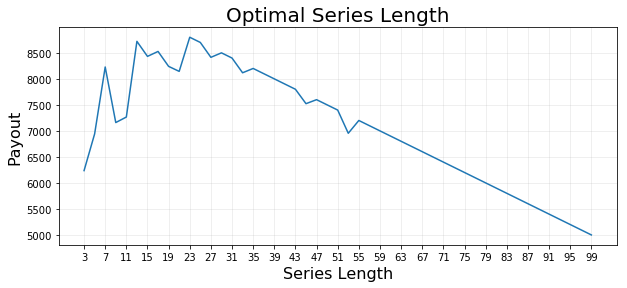

In [68]:
def optimal_series(p):
    series = [] * 48
    nList = [] * 48
    seriesLength = 100
    maxExpected = 0
    
    for i in range(3, 101, 2):
        gamesWon = 0
        for j in range(seriesLength):
            won = 0 
            lost = 0
            for k in range(i):
                game = np.random.choice([0, 1], p = [1 - p, p])
                
                if (game == 1):
                    won = won + 1
                else:
                    lost = lost + 1
                    
                if (won == ((i + 1) / 2)):
                    gamesWon = gamesWon + 1
                    break
                elif (lost == ((i + 1) / 2)):
                    break
        prob = gamesWon / seriesLength
        
        expected = (prob * (10000 - (100 * ((i + 1) / 2)))) - ((1 - prob) * 10000)
        
        series.append(expected)
        nList.append(i)
        
        if(maxExpected < expected):
            optimalN = i
            maxExpected = expected
            
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 4))
    
    plt.xticks(np.arange(3, 100, 4.0))
    plt.plot(nList, series)
    
    ax.set_title("Optimal Series Length", fontsize = 20)
    ax.set_xlabel("Series Length", fontsize = 16)
    ax.set_ylabel("Payout", fontsize = 16)
    
    ax.grid(alpha = 0.25)
    ax.set_axisbelow(True)

    return 1
optimal_series(0.7)

Here we can see that the optimal series length is roughly 23 games, with a payout of aroundd $8,700. After this point the payout begins to decrease almost linearly because you start paying Bob more and more as you play many games.

### Challenge Problem - Which Geyser Gushes First? 
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You arrive at the beautiful Three Geysers National Park. You read a placard explaining that the three eponymous geysers — creatively named $A$, $B$ and $C$ — erupt at intervals of precisely two hours, four hours and six hours, respectively. However, you just got there, so you have no idea how the three eruptions are staggered. Assuming they each started erupting at some independently random point in history, what are the probabilities that A, B and C, respectively, will be the first to erupt after your arrival?
